In [1]:
import numpy as np
import scipy.integrate as SI
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,8)

1. Numerically solve the equation of **a underdamped periodically forced oscillator**.
$$ m\frac{d^{2}x}{dt^{2}}+2mb\frac{dx}{dt}+mw^{2}x=A\cos(\varOmega t)\qquad\text{Take } m=1,b=0.3,\omega=1,\varOmega=2,A=3 \text{ at }t=0,x=1,v=0 $$
 Plot the $x-t$ and $x-v$ curve. Comment about your observation.

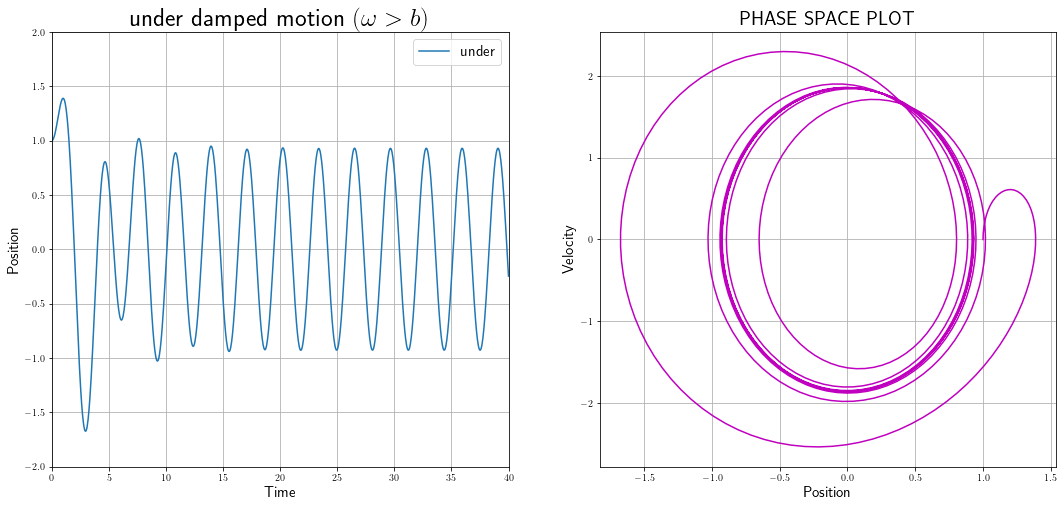

In [2]:
def f(X,t):
    x,v=X[0],X[1]
    dxdt=v
    dvdt= -0.6*v-x+3*np.cos(2*t)
    return np.array([dxdt,dvdt])

w,b = 1,0.3
X0 = [1,0]
t = np.linspace (0,40,1000)
s = SI.odeint(f,X0,t)
x,v = s[:,0],s[:,1]
plt.rcParams['text.usetex'] = True
plt.subplot(121)
plt.plot(t,x)
plt.axis([0,40,-2,+2])
plt.grid()
plt.title(r"under damped motion $(\omega>b)$",fontsize=25)
plt.xlabel ("Time",size=15);plt.ylabel ("Position",size=15)
plt.legend(["under "],fontsize=15)
plt.subplot(122) 
plt.plot(x,v,'m')
plt.grid()
plt.title("PHASE SPACE PLOT",size=20)
plt.xlabel ("Position",size=15)
plt.ylabel ("Velocity",size=15)
plt.show()

#### Comment : 
     We know that the phase space plot does not cut but here it cuts. 
     Its mean that there must be any hidden variable which we have to take into account. 
     In this case, time is the hidden variable . 
     If we are to take it into account, then there will be no cuts in the x-v plot.

2.a) Modify the above equation to estimate **the amplitude of the steady oscillation**.

The amplitude of steady state oscillation:  0.9284693772111109


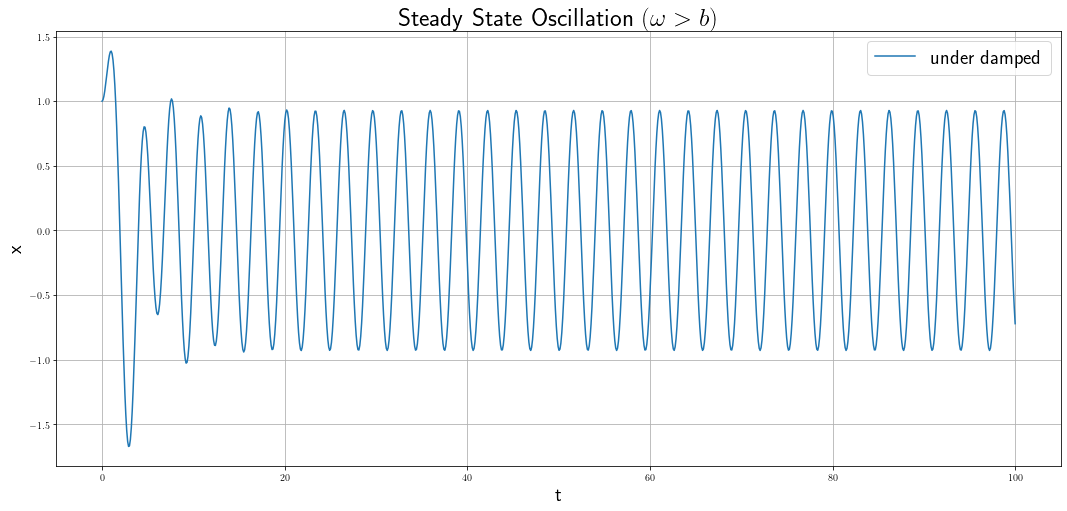

In [3]:
def f(X,t):
    x,v = X[0],X[1]
    dxdt = v
    dvdt = -0.6*v-x+3*np.cos(2*t)
    return np.array([dxdt,dvdt])

w,b = 1,0.3
X0 = [1,0]
t= np.linspace (0,100,1000)  
s = SI.odeint(f,X0,t)
x,v = s[:,0],s[:,1]
print('The amplitude of steady state oscillation: ',max(x[500:]))
plt.plot(t,x)
plt.grid()
plt.title(r"Steady State Oscillation $(\omega>b)$",size=25)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.legend(["under damped"],fontsize=20)
plt.show()

2.b) Modify prof 2(a) to simulate both **amplitude and velocity resonance**

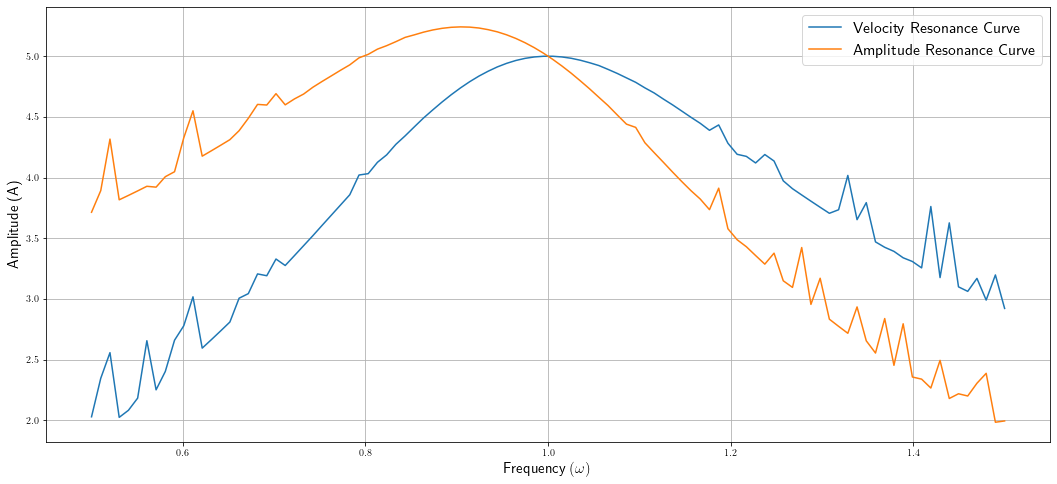

In [4]:
w, b = 1, 0.1
W = np.linspace(0.5, 1.5, 100)
V,X = [],[]

for i in W:
    def f(X, t):
        x,v = X[0],X[1]
        dxdt = v
        dvdt = -0.6 * v - x + 3 * np.cos(i * t)
        return np.array([dxdt, dvdt])
    X0 = [1, 0]
    t = np.linspace(2000, 4000, 1000)
    s = SI.odeint(f, X0, t)
    X.append(max(s[:, 0]))
    V.append(max(s[:, 1]))
plt.plot(W,V, W,X)
plt.xlabel(r'Frequency $(\omega)$',size=15)
plt.ylabel('Amplitude of velocity V_{0}',size=15)
plt.grid()
plt.ylabel('Amplitude (A)',size=15)
plt.legend(['Velocity Resonance Curve','Amplitude Resonance Curve'],fontsize=16)
plt.show()

3) Solve **a nonlinear harmonic oscillator** and plot the time series and phase plot
$$ m\frac{d^{2}x}{dt^{2}}+m \omega^{2}x^{p}=0 \qquad \text{  for p=3,5,7,9 }$$

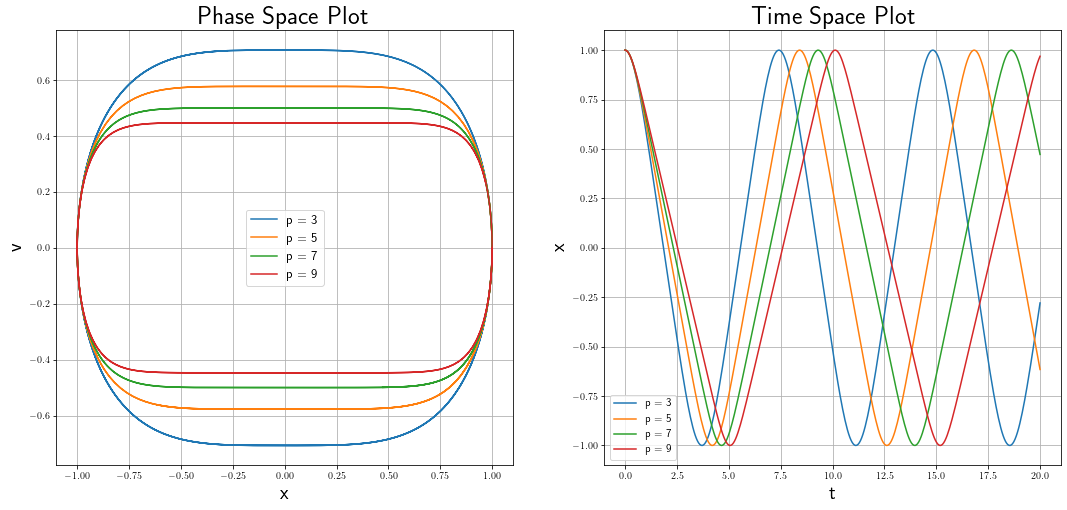

In [5]:
v0,j,w,x0 = 0,0,1,1
p = np.array([3,5,7,9])
X,V = [],[]

for i in p:
    def f(X,t): 
        x,v=X
        dx=v
        dv=-w**2*x**i
        return dx,dv
    T=np.linspace(0,20,350)
    X0=[1,0]
    s=SI.odeint(f,X0,T)
    X.append(s[:,0])
    V.append(s[:,1])       
plt.subplot(121)
plt.title("Phase Space Plot",size=25)   
plt.plot(X[0],V[0], X[1],V[1], X[2],V[2], X[3],V[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=13)
plt.xlabel ("x",size=20)
plt.ylabel ("v",size=20)
plt.grid()
plt.subplot(122)
plt.title("Time Space Plot",size=25)
plt.plot(T,X[0], T,X[1], T,X[2], T,X[3])
plt.legend(['p = 3','p = 5','p = 7','p = 9'],fontsize=11)
plt.xlabel ("t",size=20)
plt.ylabel ("x",size=20)
plt.grid()
plt.show()